# PSTAT 134 HW 1: Statistical Simulation
##  Shon Inouye

In this assignment, I will simulate various confidence intervals for the normal distribution.

A confidence interval is a range of values for which we believe the true value lies within. In this example, our true values will be the means created from various simulations of a normal distribution. These normal distributions will have $ \mu = 0 $, $\sigma^2=25$, and will be simulated $ n $ times where $ n = {10, 20, 30,...,10000} $.

$$ X \sim \mathcal{N}(0,25) $$

Let's start the simulation.

In [201]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [224]:
# Set up parameters
n_choices = np.arange(10, 10001, 10)

mean = []
conf_upper90 = []
conf_lower90 = []
conf_upper95 = []
conf_lower95 = []
conf_upper99 = []
conf_lower99 = []
variance = []

mu, sigma = 0, 5

# Simulate 1000 random observations, means, variances, and limits from a normal distribution
for n in n_choices:
    x = np.random.normal(mu,sigma,(1,n))
    mean += [x.mean()]
    variance += [x.var()]                           
    conf_upper90 += [mu + 1.645*(x.std()/np.sqrt(n))]
    conf_lower90 += [mu - 1.645*(x.std()/np.sqrt(n))]
    conf_upper95 += [mu + 1.96*(x.std()/np.sqrt(n))]
    conf_lower95 += [mu - 1.96*(x.std()/np.sqrt(n))]
    conf_upper99 += [mu + 2.576*(x.std()/np.sqrt(n))]
    conf_lower99 += [mu - 2.576*(x.std()/np.sqrt(n))]

# Create a dataframe of parameters created
df = pd.DataFrame({
    'n': n_choices,
    'Mean' : mean,
    'Variance': variance,
    '90% Confidence Upper Bound': conf_upper90,
    '90% Confidence Lower Bound': conf_lower90,
    '95% Confidence Upper Bound': conf_upper95,
    '95% Confidence Lower Bound': conf_lower95,
    '99% Confidence Upper Bound': conf_upper99,
    '99% Confidence Lower Bound': conf_lower99
})
df = df[['n',
         'Mean',
         'Variance',
         '90% Confidence Upper Bound',
         '90% Confidence Lower Bound',
         '95% Confidence Upper Bound',
         '95% Confidence Lower Bound', 
         '99% Confidence Upper Bound',
         '99% Confidence Lower Bound']]

# Show first 10 observations
df.head(10)

,n,Mean,Variance,90% Confidence Upper Bound,90% Confidence Lower Bound,95% Confidence Upper Bound,95% Confidence Lower Bound,99% Confidence Upper Bound,99% Confidence Lower Bound
0,10,-0.093366,19.806664,2.315110,-2.315110,2.758429,-2.758429,3.625363,-3.625363
1,20,-0.433934,24.529061,1.821761,-1.821761,2.170609,-2.170609,2.852800,-2.852800
2,30,0.373094,15.153209,1.169116,-1.169116,1.392989,-1.392989,1.830786,-1.830786
3,40,-0.950471,22.239643,1.226591,-1.226591,1.461470,-1.461470,1.920789,-1.920789
4,50,-0.309159,28.508834,1.242140,-1.242140,1.479997,-1.479997,1.945139,-1.945139
5,60,0.398658,26.817130,1.099756,-1.099756,1.310348,-1.310348,1.722171,-1.722171
6,70,-0.351278,29.727754,1.072008,-1.072008,1.277286,-1.277286,1.678719,-1.678719
7,80,0.383137,23.896005,0.899049,-0.899049,1.071208,-1.071208,1.407873,-1.407873
8,90,0.667280,31.358835,0.971012,-0.971012,1.156951,-1.156951,1.520564,-1.520564
9,100,-0.296750,34.856995,0.971205,-0.971205,1.157180,-1.157180,1.520866,-1.520866


Here we can see our simulated data for each value of $n$. 

Now, let's check the average value of $\mu$ over all simulations.

In [221]:
np.mean(df['Mean'])

0.0078954786694878636

We can see that this is very close to the true $\mu$, which is 0.

Now let's check the average value of $\sigma^2$.

In [222]:
np.mean(df['Variance'])

24.956322306625861

Like $\mu$, the average value of $\sigma^2$ over all simulations is also very close to the true value of $\sigma^2$, which is 25.

Now, here is a plot of the $\mu$ values for various values of $n$.

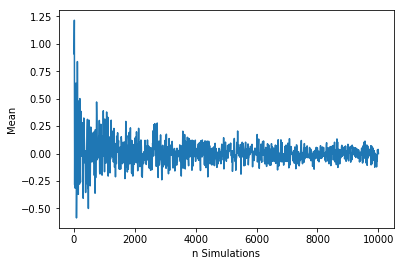

In [223]:
# Plot of normal distribution means
plt.plot(df['n'], df['Mean']);
plt.xlabel("n Simulations");
plt.ylabel("Mean");

We can see that as the number of simulations of the normal distribution increase, the value of $\mu$ tends to shrink.

Now on to confidence intervals. As shown in the code above, the equation for calculating the upper and lower bounds for a confidence interval is:

$$ \bar X \pm Z \frac \sigma {\sqrt{n}} $$

where:

* $\bar X$ is the mean
* $Z$ is the Z-score
* $\sigma$ is the standard deviation
* $n$ is the number of simulations


The Z-score and confidence level are determined by the value of $\alpha$, as shown in the table below:

$ \alpha $ | (1 - $\alpha$)    | Confidence Level | Z score
--- | ----- | --- | ---
0.1 | 0.90 | 90% | 1.645
0.05 | 0.95 | 95% | 1.960
0.01 | 0.99 | 99% | 2.576

Let's take a look at the 90% confidence interval where $\alpha$ = 0.1

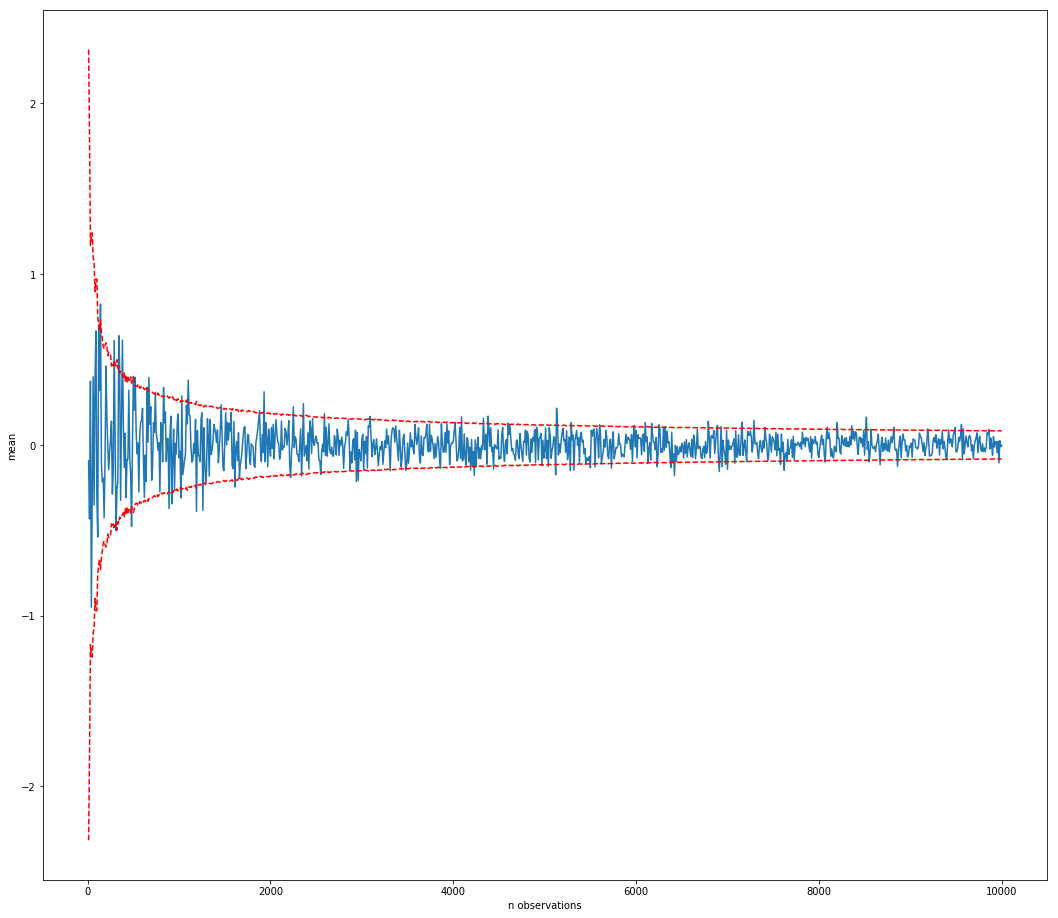

In [234]:
# Plot of normal distribution means with 90% CI
plt.figure(figsize=(18, 16))
plt.plot(df['n'], df['Mean']);
plt.plot((df['n']),  df['90% Confidence Upper Bound'], '--r');
plt.plot((df['n']), df['90% Confidence Lower Bound'], '--r');
plt.xlabel("n observations");
plt.ylabel("mean");

Within the red dotted lines, we are 90% confident that the values of the normal distribution will fall within this range.

Let's add the 95% and 99% confidence intervals as well.

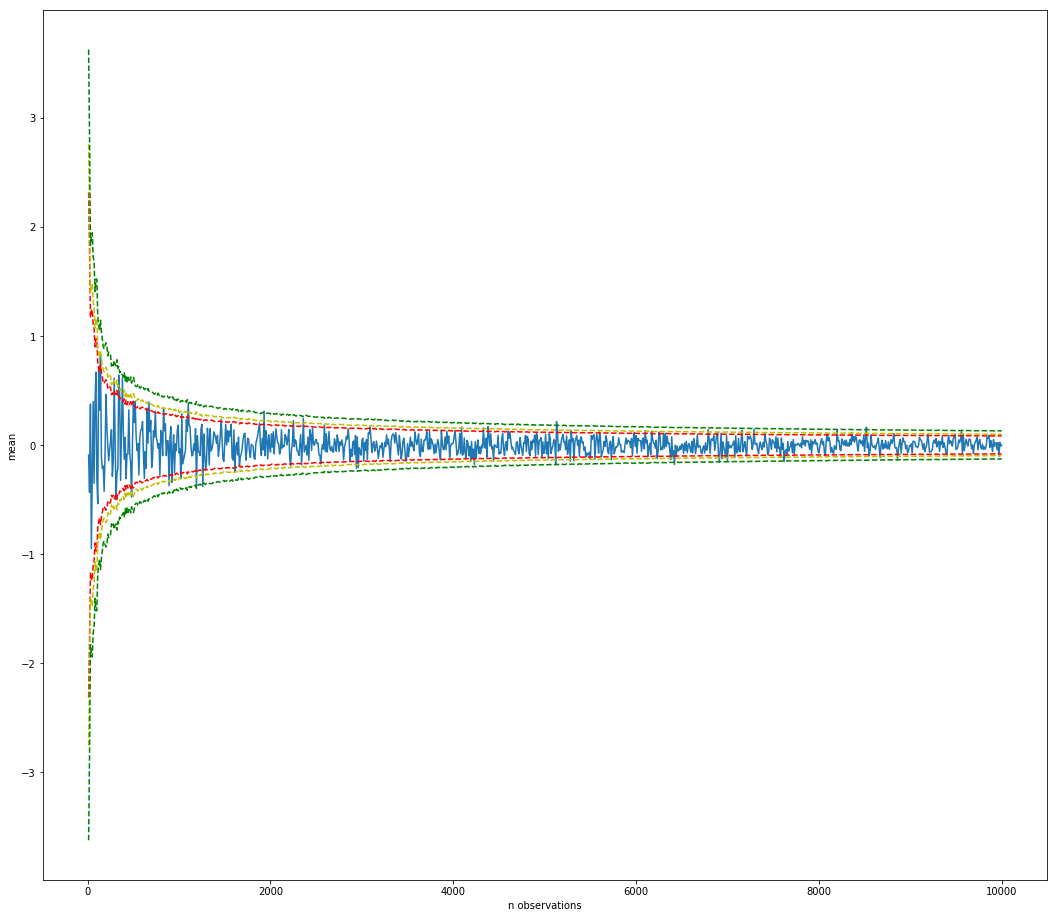

In [230]:
# Plot of normal distribution means with 90%, 95%, and 99% CI
plt.figure(figsize=(18, 16))
plt.plot(df['n'], df['Mean']);
plt.plot((df['n']),  df['90% Confidence Upper Bound'], '--r');
plt.plot((df['n']), df['90% Confidence Lower Bound'], '--r');
plt.plot((df['n']),  df['95% Confidence Upper Bound'], '--y');
plt.plot((df['n']), df['95% Confidence Lower Bound'], '--y');
plt.plot((df['n']),  df['99% Confidence Upper Bound'], '--g');
plt.plot((df['n']), df['99% Confidence Lower Bound'], '--g');
plt.xlabel("n observations");
plt.ylabel("mean");

From these values and plots, we can calculate the number of times the confidence bound is breached for each value of $1 - \alpha$.

In [249]:
# Count number of times confidence bound is breached
count90 = 0
count95 = 0
count99 = 0

for i in range(len(df)):
    if (df['Mean'][i] < df['90% Confidence Lower Bound'][i]):
        count90 = count90 + 1
    if (df['Mean'][i] > df['90% Confidence Upper Bound'][i]):
        count90 = count90 + 1
    if (df['Mean'][i] < df['95% Confidence Lower Bound'][i]):
        count95 = count95 + 1
    if (df['Mean'][i] > df['95% Confidence Upper Bound'][i]):
        count95 = count95 + 1
    if (df['Mean'][i] < df['99% Confidence Lower Bound'][i]):
        count99 = count99 + 1
    if (df['Mean'][i] > df['99% Confidence Upper Bound'][i]):
        count99 = count99 + 1
        
print(' 90% Confidence Breach: ', count90, '\n',
      '95% Confidence Breach: ', count95, '\n',
      '99% Confidence Breach: ', count99, '\n',)

 90% Confidence Breach:  100 
 95% Confidence Breach:  47 
 99% Confidence Breach:  6 



So as we can see, the number of times the confidence bound is breached goes down as the value of $1 - \alpha$ increases.